In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
data_fix = data.drop(['Unnamed: 0'], axis=1)

In [5]:
data_fix.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [7]:
def find_missing_data():
    print('Training Data check:\n')
    train_total = data_fix.isnull().sum().sort_values(ascending=False)
    train_percent_1 = data_fix.isnull().sum()/data_fix.isnull().count()*100
    train_percent_2 = (round(train_percent_1, 1)).sort_values(ascending=False)
    train_missing_data = pd.concat([train_total, train_percent_2], axis=1, keys=['Total', '%'])
    print(train_missing_data.head(24))
    

find_missing_data()

Training Data check:

                                   Total    %
Arrival Delay in Minutes             310  0.3
id                                     0  0.0
Gender                                 0  0.0
Departure Delay in Minutes             0  0.0
Cleanliness                            0  0.0
Inflight service                       0  0.0
Checkin service                        0  0.0
Baggage handling                       0  0.0
Leg room service                       0  0.0
On-board service                       0  0.0
Inflight entertainment                 0  0.0
Seat comfort                           0  0.0
Online boarding                        0  0.0
Food and drink                         0  0.0
Gate location                          0  0.0
Ease of Online booking                 0  0.0
Departure/Arrival time convenient      0  0.0
Inflight wifi service                  0  0.0
Flight Distance                        0  0.0
Class                                  0  0.0
Type of Trav

In [8]:
data_fix.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


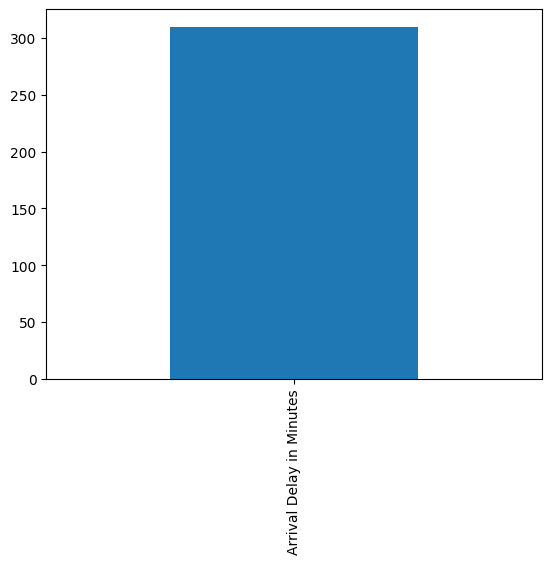

In [9]:
missing = data_fix.isnull().sum()
missing = missing[missing > 0]
#we can use bar plot to check missing values
missing.sort_values(inplace =True)
missing.plot.bar()
plt.show()

In [10]:
df_fix = data_fix.dropna(subset=['Arrival Delay in Minutes'])

In [11]:
def find_missing_data():
    print('Training Data check:\n')
    train_total = df_fix.isnull().sum().sort_values(ascending=False)
    train_percent_1 = df_fix.isnull().sum()/df_fix.isnull().count()*100
    train_percent_2 = (round(train_percent_1, 1)).sort_values(ascending=False)
    train_missing_data = pd.concat([train_total, train_percent_2], axis=1, keys=['Total', '%'])
    print(train_missing_data.head(24))
    

find_missing_data()

Training Data check:

                                   Total    %
id                                     0  0.0
Gender                                 0  0.0
Arrival Delay in Minutes               0  0.0
Departure Delay in Minutes             0  0.0
Cleanliness                            0  0.0
Inflight service                       0  0.0
Checkin service                        0  0.0
Baggage handling                       0  0.0
Leg room service                       0  0.0
On-board service                       0  0.0
Inflight entertainment                 0  0.0
Seat comfort                           0  0.0
Online boarding                        0  0.0
Food and drink                         0  0.0
Gate location                          0  0.0
Ease of Online booking                 0  0.0
Departure/Arrival time convenient      0  0.0
Inflight wifi service                  0  0.0
Flight Distance                        0  0.0
Class                                  0  0.0
Type of Trav

In [12]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   Gender                             103594 non-null  object 
 2   Customer Type                      103594 non-null  object 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  object 
 5   Class                              103594 non-null  object 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink                     103594 no

In [13]:
df_numeric_features = df_fix.select_dtypes(include=[np.number])

df_numeric_features.columns

Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [14]:
df_numeric_features.shape

(103594, 19)

In [15]:
df_categorical_features = df_fix.select_dtypes(include=[object])

df_categorical_features.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [16]:
df_categorical_features.shape

(103594, 5)

In [17]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

df_numcols_norm = pd.DataFrame(min_max.fit_transform(df_numeric_features.iloc[:,0:19]),
columns = df_numeric_features.iloc[:,0:19].columns.tolist())
df_numcols_norm.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.540280,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364
1,0.038852,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788
2,0.847150,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000
3,0.184980,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682
4,0.918532,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000


In [18]:
for col in df_categorical_features.columns.values:
    one_hot_encoded_variables = pd.get_dummies(df_categorical_features[col], prefix=col)
    df_categorical_features = pd.concat([df_categorical_features,one_hot_encoded_variables], axis = 1)
    df_categorical_features.drop([col], axis = 1, inplace = True)

In [19]:
df_new_data = pd.concat([df_numcols_norm, df_categorical_features], axis = 1)

In [20]:
pd.set_option('display.max_columns', None)
df_new_data.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0.540280,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,False,True,True,False,False,True,False,False,True,True,False
1,0.038852,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,False,True,False,True,True,False,True,False,False,True,False
2,0.847150,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,True,False,True,False,True,False,True,False,False,False,True
3,0.184980,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,True,False,True,False,True,False,True,False,False,True,False
4,0.918532,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,False,True,True,False,True,False,True,False,False,False,True


In [21]:
def find_missing_data():
    print('Training Data check:\n')
    train_total = df_new_data.isnull().sum().sort_values(ascending=False)
    train_percent_1 = df_new_data.isnull().sum()/df_new_data.isnull().count()*100
    train_percent_2 = (round(train_percent_1, 1)).sort_values(ascending=False)
    train_missing_data = pd.concat([train_total, train_percent_2], axis=1, keys=['Total', '%'])
    print(train_missing_data.head(38))
    

find_missing_data()

Training Data check:

                                      Total    %
id                                      310  0.3
Age                                     310  0.3
satisfaction_neutral or dissatisfied    310  0.3
Class_Eco Plus                          310  0.3
Class_Eco                               310  0.3
Class_Business                          310  0.3
Type of Travel_Personal Travel          310  0.3
Type of Travel_Business travel          310  0.3
Customer Type_disloyal Customer         310  0.3
Customer Type_Loyal Customer            310  0.3
Gender_Male                             310  0.3
Gender_Female                           310  0.3
Arrival Delay in Minutes                310  0.3
Departure Delay in Minutes              310  0.3
Cleanliness                             310  0.3
Inflight service                        310  0.3
Checkin service                         310  0.3
Baggage handling                        310  0.3
Leg room service                        310  0.

In [22]:
df_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 30 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    103594 non-null  float64
 1   Age                                   103594 non-null  float64
 2   Flight Distance                       103594 non-null  float64
 3   Inflight wifi service                 103594 non-null  float64
 4   Departure/Arrival time convenient     103594 non-null  float64
 5   Ease of Online booking                103594 non-null  float64
 6   Gate location                         103594 non-null  float64
 7   Food and drink                        103594 non-null  float64
 8   Online boarding                       103594 non-null  float64
 9   Seat comfort                          103594 non-null  float64
 10  Inflight entertainment                103594 non-null  float64
 11  

In [23]:
df_new_data_fix = df_new_data.dropna()  

In [24]:
def find_missing_data():
    print('Training Data check:\n')
    train_total = df_new_data_fix.isnull().sum().sort_values(ascending=False)
    train_percent_1 = df_new_data_fix.isnull().sum()/df_new_data_fix.isnull().count()*100
    train_percent_2 = (round(train_percent_1, 1)).sort_values(ascending=False)
    train_missing_data = pd.concat([train_total, train_percent_2], axis=1, keys=['Total', '%'])
    print(train_missing_data.head(38))
    

find_missing_data()

Training Data check:

                                      Total    %
id                                        0  0.0
Age                                       0  0.0
satisfaction_neutral or dissatisfied      0  0.0
Class_Eco Plus                            0  0.0
Class_Eco                                 0  0.0
Class_Business                            0  0.0
Type of Travel_Personal Travel            0  0.0
Type of Travel_Business travel            0  0.0
Customer Type_disloyal Customer           0  0.0
Customer Type_Loyal Customer              0  0.0
Gender_Male                               0  0.0
Gender_Female                             0  0.0
Arrival Delay in Minutes                  0  0.0
Departure Delay in Minutes                0  0.0
Cleanliness                               0  0.0
Inflight service                          0  0.0
Checkin service                           0  0.0
Baggage handling                          0  0.0
Leg room service                          0  0.

In [25]:
df_new_data_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103284 entries, 0 to 103593
Data columns (total 30 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    103284 non-null  float64
 1   Age                                   103284 non-null  float64
 2   Flight Distance                       103284 non-null  float64
 3   Inflight wifi service                 103284 non-null  float64
 4   Departure/Arrival time convenient     103284 non-null  float64
 5   Ease of Online booking                103284 non-null  float64
 6   Gate location                         103284 non-null  float64
 7   Food and drink                        103284 non-null  float64
 8   Online boarding                       103284 non-null  float64
 9   Seat comfort                          103284 non-null  float64
 10  Inflight entertainment                103284 non-null  float64
 11  On-bo

In [26]:
df_new_data_fix.rename(columns = {'satisfaction_neutral or dissatisfied':'satisfaction_0'}, inplace = True)

C:\Users\aw347\AppData\Local\Temp\ipykernel_10544\4070999990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_data_fix.rename(columns = {'satisfaction_neutral or dissatisfied':'satisfaction_0'}, inplace = True)


In [27]:
df_new_data_fix.rename(columns = {'satisfaction_satisfied':'satisfaction_1'}, inplace = True)

C:\Users\aw347\AppData\Local\Temp\ipykernel_10544\2925073177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_data_fix.rename(columns = {'satisfaction_satisfied':'satisfaction_1'}, inplace = True)


In [28]:
df_new_data_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103284 entries, 0 to 103593
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103284 non-null  float64
 1   Age                                103284 non-null  float64
 2   Flight Distance                    103284 non-null  float64
 3   Inflight wifi service              103284 non-null  float64
 4   Departure/Arrival time convenient  103284 non-null  float64
 5   Ease of Online booking             103284 non-null  float64
 6   Gate location                      103284 non-null  float64
 7   Food and drink                     103284 non-null  float64
 8   Online boarding                    103284 non-null  float64
 9   Seat comfort                       103284 non-null  float64
 10  Inflight entertainment             103284 non-null  float64
 11  On-board service                   103284 no

In [29]:
df_new_data_fix.replace({False: 0, True: 1}, inplace=True)

C:\Users\aw347\AppData\Local\Temp\ipykernel_10544\155908391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_data_fix.replace({False: 0, True: 1}, inplace=True)


In [30]:
df_new_data_fix.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_0,satisfaction_1
0,0.540280,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,0,1,1,0,0,1,0,0,1,1,0
1,0.038852,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,0,1,0,1,1,0,1,0,0,1,0
2,0.847150,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,1,0,1,0,1,0,1,0,0,0,1
3,0.184980,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,1,0,1,0,1,0,1,0,0,1,0
4,0.918532,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,0,1,1,0,1,0,1,0,0,0,1


In [31]:
X = df_new_data_fix.drop(['satisfaction_0','satisfaction_1'], axis=1)

In [32]:
y = df_new_data_fix[["satisfaction_0", "satisfaction_1"]]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [34]:
X_train.shape, X_test.shape

((69200, 28), (34084, 28))

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score 
print('Точность модели при 100 деревьях в случайном лесу : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Точность модели при 100 деревьях в случайном лесу : 0.7729


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     19266
           1       0.74      0.74      0.74     14818

   micro avg       0.78      0.77      0.78     34084
   macro avg       0.78      0.77      0.77     34084
weighted avg       0.78      0.77      0.78     34084
 samples avg       0.77      0.77      0.77     34084



C:\Users\aw347\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Class_Business                       0.080473
id                                   0.079806
Flight Distance                      0.078209
Type of Travel_Business travel       0.075306
Type of Travel_Personal Travel       0.073200
Class_Eco                            0.071393
Age                                  0.066273
Arrival Delay in Minutes             0.036302
Departure Delay in Minutes           0.035787
Customer Type_Loyal Customer         0.033806
Customer Type_disloyal Customer      0.029769
Checkin service                      0.027613
Leg room service                     0.025915
Departure/Arrival time convenient    0.025766
Gate location                        0.024263
Online boarding                      0.023340
On-board service                     0.023105
Ease of Online booking               0.022571
Food and drink                       0.022117
Baggage handling                     0.022060
Seat comfort                         0.021731
Inflight wifi service             